In [1]:
import pandas as pd
import os
import numpy as np
import json
import glob
import hashlib
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df_rag_st= pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/final_rag_combined_results_with_both_adjusted_accuracy.csv')
df_baseline_st = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/final_baseline_combined_results_with_both_adjusted_accuracy.csv')
df_baseline_te = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/baseline_openai_header_combined_results_with_both_adjusted_accuracy.csv')
df_rag_te = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/openai_header_data_with_both_adjusted_accuracy.csv')

df_baseline_filtered = df_baseline_st[(df_baseline_st['qna_model'] == 'gpt_5_mini') & (df_baseline_st['retrieval_model'] == 'gpt_5_mini')]
df_rag_filtered = df_rag_st[(df_rag_st['qna_model'] == 'gpt_5_mini') & (df_rag_st['retrieval_model'] == 'gpt_5_mini')]
df_baseline_te_filtered = df_baseline_te[(df_baseline_te['qna_model'] == 'gpt_5_mini') & (df_baseline_te['retrieval_model'] == 'gpt_5_mini')]

df_rag_f5 = pd.concat([df_rag_filtered, df_rag_te], ignore_index=True)
df_baseline_f5 = pd.concat([df_baseline_filtered, df_baseline_te_filtered], ignore_index=True)
df_f5 = pd.concat([df_baseline_f5, df_rag_f5], ignore_index=True)
df_f5.columns.tolist()

['case_id',
 'Q0',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'token_input',
 'token_output',
 'token_total',
 'top_k',
 'retrieval_count',
 'combo_folder',
 'retrieval_model',
 'qna_model',
 'match',
 'representation',
 'correct',
 'adjusted_total',
 'adjusted_accuracy',
 'wrong_questions',
 'ground_truth',
 'error']

In [3]:
columns_to_keep = ['case_id', 'Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
                   'match', 'representation', 'correct', 'adjusted_total', 
                   'adjusted_accuracy', 'wrong_questions', 'ground_truth', 'combo_folder']

df_f5_filtered = df_f5[df_f5['error'].isna()][columns_to_keep]
df_f5_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,1,Baseline_SentenceTransformer,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,Baseline_SentenceTransformer,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,Baseline_SentenceTransformer,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,Baseline_SentenceTransformer,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,Baseline_SentenceTransformer,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [4]:
pd.DataFrame({
    'count': df_f5_filtered['representation'].value_counts(),
    'percentage': df_f5_filtered['representation'].value_counts(normalize=True) * 100
})

,count,percentage
representation,,
Baseline_SentenceTransformer,420,25.014890
Baseline_OpenAI,420,25.014890
RAG_OpenAI,420,25.014890
RAG_SentenceTransformer,419,24.955331


In [5]:
df_st = pd.concat([df_baseline_st, df_rag_st], ignore_index=True)
df_te = pd.concat([df_baseline_te, df_rag_te], ignore_index=True)
df_f7 = pd.concat([df_st, df_te], ignore_index=True)
df_f7_filtered = df_f7[df_f7['error'].isna()][columns_to_keep]
df_f7_filtered.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
0,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,1,Baseline_SentenceTransformer,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
1,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,Baseline_SentenceTransformer,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
2,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,Baseline_SentenceTransformer,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,Baseline_SentenceTransformer,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
4,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,Baseline_SentenceTransformer,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [6]:
pd.DataFrame({
    'count': df_f7_filtered['representation'].value_counts(),
    'percentage': df_f7_filtered['representation'].value_counts(normalize=True) * 100
})

,count,percentage
representation,,
Baseline_SentenceTransformer,1680,40.009526
RAG_SentenceTransformer,1679,39.985711
Baseline_OpenAI,420,10.002382
RAG_OpenAI,420,10.002382


In [7]:
df_f5_filtered.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/combined_f5_filtered_results.csv', index=False)
df_f7_filtered.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/combined_f7_filtered_results.csv', index=False)

In [8]:
result = df_f5_filtered.groupby(['match', 'representation']).agg({
    'case_id': 'count',
    'adjusted_accuracy': ['mean', 'median'],
    'correct': 'mean',
    'adjusted_total': 'mean'
}).round(2)

print(result)

                                   case_id adjusted_accuracy         correct  \
                                     count              mean  median    mean   
match representation                                                           
0     Baseline_OpenAI                   85             75.43   80.00    3.92   
      Baseline_SentenceTransformer     270             76.15   75.00    4.63   
      RAG_OpenAI                        85             71.53   66.67    3.49   
      RAG_SentenceTransformer          269             73.30   71.43    4.27   
1     Baseline_OpenAI                  335             80.65   83.33    4.87   
      Baseline_SentenceTransformer     150             85.79  100.00    4.77   
      RAG_OpenAI                       335             86.91   87.50    5.50   
      RAG_SentenceTransformer          150             87.09  100.00    4.88   

                                   adjusted_total  
                                             mean  
match represent

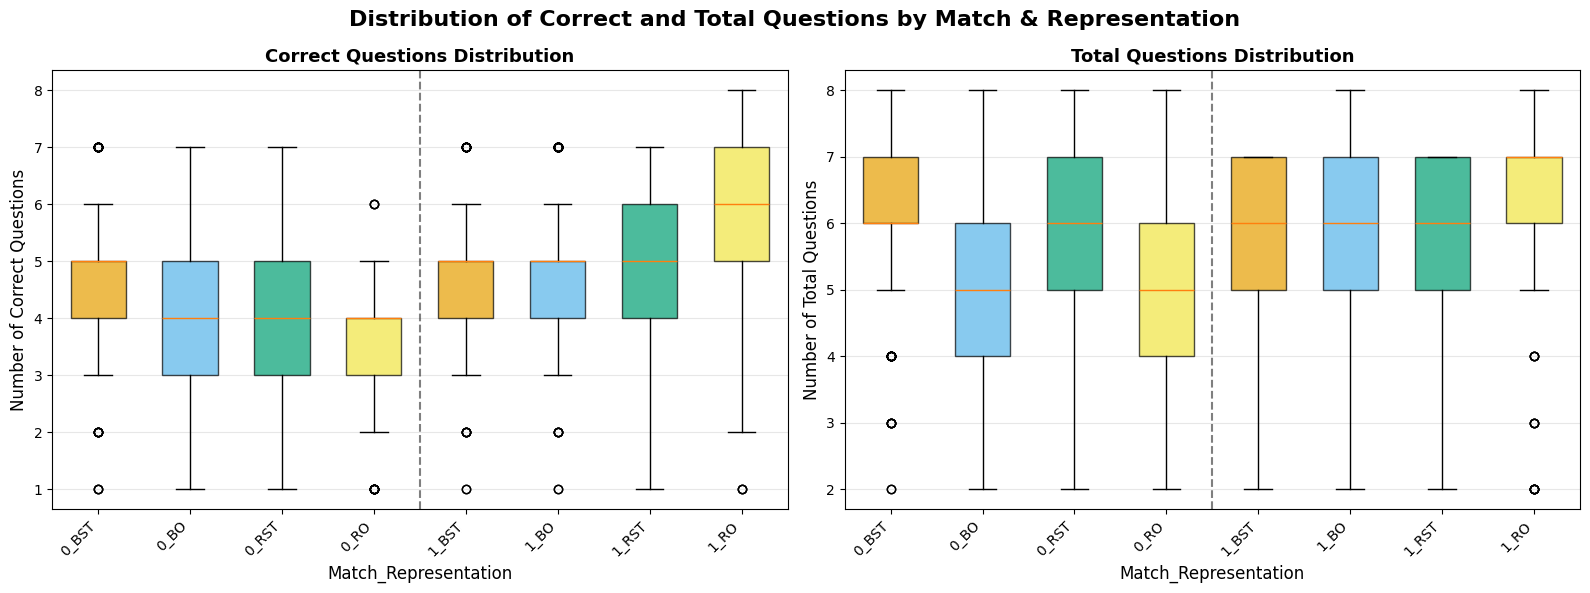

In [9]:
df_f5_filtered['combo'] = df_f5_filtered['match'].astype(str) + '_' + df_f5_filtered['representation']

# Color-blind friendly colors
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442',
          '#E69F00', '#56B4E9', '#009E73', '#F0E442']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Correct and Total Questions by Match & Representation', 
             fontsize=16, fontweight='bold')

# Combo 순서 정의
combo_order = ['0_Baseline_SentenceTransformer', '0_Baseline_OpenAI', 
               '0_RAG_SentenceTransformer', '0_RAG_OpenAI',
               '1_Baseline_SentenceTransformer', '1_Baseline_OpenAI',
               '1_RAG_SentenceTransformer', '1_RAG_OpenAI']

# 1. Correct questions box plot
ax1 = axes[0]
data_correct = [df_f5_filtered[df_f5_filtered['combo'] == c]['correct'].values for c in combo_order]
bp1 = ax1.boxplot(data_correct, patch_artist=True, widths=0.6)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.set_xlabel('Match_Representation', fontsize=12)
ax1.set_ylabel('Number of Correct Questions', fontsize=12)
ax1.set_title('Correct Questions Distribution', fontsize=13, fontweight='bold')
ax1.set_xticklabels(['0_BST', '0_BO', '0_RST', '0_RO',
                     '1_BST', '1_BO', '1_RST', '1_RO'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(x=4.5, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

# 2. Total questions box plot
ax2 = axes[1]
data_total = [df_f5_filtered[df_f5_filtered['combo'] == c]['adjusted_total'].values for c in combo_order]
bp2 = ax2.boxplot(data_total, patch_artist=True, widths=0.6)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_xlabel('Match_Representation', fontsize=12)
ax2.set_ylabel('Number of Total Questions', fontsize=12)
ax2.set_title('Total Questions Distribution', fontsize=13, fontweight='bold')
ax2.set_xticklabels(['0_BST', '0_BO', '0_RST', '0_RO',
                     '1_BST', '1_BO', '1_RST', '1_RO'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(x=4.5, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

plt.tight_layout()
#plt.savefig('/mnt/user-data/outputs/correct_total_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
def get_file_md5(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

pdf_dir = '/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/policy_answer_real'
all_pdfs = glob.glob(f"{pdf_dir}/**/*.pdf", recursive=True)

with open('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/new_ground_truth.json', "r") as f:
    gt_data = json.load(f)

with open('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/dataset/qna_free_text_sample.json', 'r') as f:
    cases_data = json.load(f)

cases_dict = {case['id']: case for case in cases_data}

In [11]:
df_f7_st = df_f7_filtered[df_f7_filtered['representation'].str.contains('SentenceTransformer')]
df_f7_te = df_f7_filtered[df_f7_filtered['representation'].str.contains('OpenAI')]
df_f7_te.head()

,case_id,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,match,representation,correct,adjusted_total,adjusted_accuracy,wrong_questions,ground_truth,combo_folder
3360,Case10075,CMA,Not Specified,Not Specified,Not Specified,Not Specified,Yes,Yes,81228,Yes,0,Baseline_OpenAI,2,2,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3361,Case11795,WES,Yes,Not Specified,Yes,Yes,Yes,Yes,81415,Yes,1,Baseline_OpenAI,7,7,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3362,Case12792,BRCA1/2,Not Specified,Not Specified,No,Not Specified,No,Yes,Not Specified,No,1,Baseline_OpenAI,5,5,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3363,Case13983,WGS,Yes,Not Specified,Yes,Not Specified,Yes,Yes,81425,Yes,1,Baseline_OpenAI,6,6,100.000000,NaN,NaN,top1_10retrieve_gpt_5_mini_gpt_5_mini
3364,Case14017,WES,Not Specified,Not Specified,Yes,No,Yes,Yes,81415,No,1,Baseline_OpenAI,4,6,66.666667,"Q4,Q5",Q4:Yes|Q5:No,top1_10retrieve_gpt_5_mini_gpt_5_mini


In [12]:
df_f7_st_matched = df_f7_st[df_f7_st['match'] == 1]
df_f7_st_unmatched = df_f7_st[df_f7_st['match'] == 0]
df_f7_te_matched = df_f7_te[df_f7_te['match'] == 1]
df_f7_te_unmatched = df_f7_te[df_f7_te['match'] == 0]

baseline_st = df_f7_st_matched[df_f7_st_matched['representation'] == 'Baseline_SentenceTransformer'][['case_id', 'Q3', 'combo_folder']].copy()
baseline_st.columns = ['case_id', 'Q3_baseline', 'combo_folder']
rag_st = df_f7_st_matched[df_f7_st_matched['representation'] == 'RAG_SentenceTransformer'][['case_id', 'Q3', 'combo_folder']].copy()
rag_st.columns = ['case_id', 'Q3_rag', 'combo_folder']

comparison_st = baseline_st.merge(rag_st, on=['case_id', 'combo_folder'], how='inner')
comparison_st['Q3_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q3', ''))

comparison_st['Q3_baseline_correct'] = (comparison_st['Q3_baseline'].astype(str).str.strip() == 
                                        comparison_st['Q3_gt'].astype(str).str.strip())
comparison_st['Q3_rag_correct'] = (comparison_st['Q3_rag'].astype(str).str.strip() == 
                                   comparison_st['Q3_gt'].astype(str).str.strip())

q3_baseline_wins_st = comparison_st[
    (comparison_st['Q3_baseline_correct'] == True) & 
    (comparison_st['Q3_rag_correct'] == False)
]

results_st = []
for case_id, group in q3_baseline_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['combo_folder'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_st.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q3_baseline': group.iloc[0]['Q3_baseline'],
        'Q3_rag': group.iloc[0]['Q3_rag'],
        'Q3_gt': group.iloc[0]['Q3_gt']
    })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values('count', ascending=False)
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q3_baseline_wins_sentence_transformer.csv', index=False)
print(results_st_df)

      case_id  count                                             combos  \
11   Case3494     12  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
8    Case2162     12  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
12   Case5674     10  [top1_10retrieve_gpt_5_mini_gpt_5, top1_10retr...   
6   Case18821      9  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
3   Case13983      7  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
17   Case8485      7  [top1_30retrieve_gpt_5_mini_gpt_5_mini, top1_3...   
4   Case14017      7  [top1_10retrieve_gpt_5_mini_gpt_5, top1_10retr...   
13   Case6747      6  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
7   Case19162      5  [top1_10retrieve_gpt_5_mini_gpt_5_mini, top1_1...   
16    Case811      4  [top1_10retrieve_gpt_5_mini_gpt_5, top1_30retr...   
15   Case8051      4  [top1_10retrieve_gpt_5_gpt_5_mini, top1_30retr...   
9    Case2666      3  [top1_10retrieve_gpt_5_mini_gpt_5, top3_30retr...   
10   Case2847      3  [to

In [13]:
print(df_f7_te_matched[df_f7_te_matched['representation'] == 'Baseline_OpenAI']['case_id'].value_counts().head())
print(df_f7_te_matched[df_f7_te_matched['representation'] == 'RAG_OpenAI']['case_id'].value_counts().head())

case_id
Case11795    4
Case12792    4
Case13983    4
Case14017    4
Case14195    4
Name: count, dtype: int64
case_id
Case10363    4
Case10427    4
Case10451    4
Case10850    4
Case10917    4
Name: count, dtype: int64


In [14]:
print("=== 전체 컬럼 ===")
print(df_f7_te.columns.tolist())

# Case10363의 모든 행 보기
print("\n=== Case10363 전체 데이터 ===")
sample = df_f7_te_matched[df_f7_te_matched['case_id'] == 'Case10363']
print(sample)

=== 전체 컬럼 ===
['case_id', 'Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'match', 'representation', 'correct', 'adjusted_total', 'adjusted_accuracy', 'wrong_questions', 'ground_truth', 'combo_folder']

=== Case10363 전체 데이터 ===
        case_id   Q0             Q1             Q2   Q3   Q4  Q5   Q6  \
3510  Case10363  WGS  Not Specified  Not Specified  Yes  Yes  No  Yes   
3580  Case10363  WGS            Yes  Not Specified  Yes   No  No  Yes   
3646  Case10363  WGS            Yes  Not Specified  Yes   No  No  Yes   
3715  Case10363  WGS  Not Specified  Not Specified  Yes   No  No  Yes   
3780  Case10363  WGS            Yes             No   No  Yes  No  Yes   
3863  Case10363  WGS  Not Specified             No   No  Yes  No  Yes   
3945  Case10363  WGS            Yes             No   No  Yes  No  Yes   
4030  Case10363  WGS  Not Specified             No   No  Yes  No  Yes   

                 Q7   Q8  match   representation  correct  adjusted_total  \
3510          81425  Yes      1

In [15]:
def extract_retrieval_config(combo):
    # "top1_10retrieve" 또는 "top3_30retrieve" 같은 부분만 추출
    import re
    match = re.search(r'(top\d+_\d+retrieve)', combo)
    return match.group(1) if match else combo

baseline_te = df_f7_te_matched[df_f7_te_matched['representation'] == 'Baseline_OpenAI'][['case_id', 'Q3', 'combo_folder']].copy()
baseline_te['retrieval_config'] = baseline_te['combo_folder'].apply(extract_retrieval_config)
baseline_te.columns = ['case_id', 'Q3_baseline', 'combo_baseline', 'retrieval_config']

rag_te = df_f7_te_matched[df_f7_te_matched['representation'] == 'RAG_OpenAI'][['case_id', 'Q3', 'combo_folder']].copy()
rag_te['retrieval_config'] = rag_te['combo_folder'].apply(extract_retrieval_config)
rag_te.columns = ['case_id', 'Q3_rag', 'combo_rag', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q3_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q3', ''))   
comparison_te['Q3_baseline_correct'] = (comparison_te['Q3_baseline'].astype(str).str.strip() == 
                                        comparison_te['Q3_gt'].astype(str).str.strip())
comparison_te['Q3_rag_correct'] = (comparison_te['Q3_rag'].astype(str).str.strip() == 
                                   comparison_te['Q3_gt'].astype(str).str.strip())

q3_baseline_wins_te = comparison_te[
    (comparison_te['Q3_baseline_correct'] == True) & 
    (comparison_te['Q3_rag_correct'] == False)
]

results_te = []
for case_id, group in q3_baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    combos = group['retrieval_config'].tolist()
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break
    
    results_te.append({
        'case_id': case_id,
        'count': len(group),
        'combos': combos,
        'patient_info': case_info.get('patient_info', 'N/A'),
        'document_name': found_doc if found_doc else 'Not Found',
        'Q3_baseline': group.iloc[0]['Q3_baseline'],
        'Q3_rag': group.iloc[0]['Q3_rag'],
        'Q3_gt': group.iloc[0]['Q3_gt']
    })

results_te_df = pd.DataFrame(results_te)
results_te_df = results_te_df.sort_values('count', ascending=False)
results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q3_baseline_wins_openai.csv', index=False)
print(results_te_df)

      case_id  count                                             combos  \
0   Case10363      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
23   Case7376      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
15   Case2496      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
12  Case18821      4  [top1_10retrieve, top1_30retrieve, top3_10retr...   
11  Case17822      3  [top1_10retrieve, top1_30retrieve, top3_10retr...   
18   Case5380      3  [top1_10retrieve, top3_10retrieve, top3_30retr...   
22   Case6747      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
20   Case5885      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
14   Case2162      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
1   Case11514      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
6   Case13983      3  [top1_10retrieve, top1_30retrieve, top3_10retr...   
5   Case13675      3  [top1_10retrieve, top1_30retrieve, top3_30retr...   
19   Case5605      2     

In [26]:
baseline_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'Baseline_SentenceTransformer'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
baseline_st.columns = ['case_id', 'Q1_baseline', 'Q2_baseline', 'combo_folder']
rag_st = df_f7_st_unmatched[df_f7_st_unmatched['representation'] == 'RAG_SentenceTransformer'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
rag_st.columns = ['case_id', 'Q1_rag', 'Q2_rag', 'combo_folder']

comparison_st = baseline_st.merge(rag_st, on=['case_id', 'combo_folder'], how='inner')
comparison_st['Q1_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q1', ''))
comparison_st['Q2_gt'] = comparison_st['case_id'].map(lambda x: gt_data.get(x, {}).get('Q2', ''))

for q in ['Q1', 'Q2']:
    comparison_st[f'{q}_baseline_correct'] = (comparison_st[f'{q}_baseline'].astype(str).str.strip() == 
                                              comparison_st[f'{q}_gt'].astype(str).str.strip())
    comparison_st[f'{q}_rag_correct'] = (comparison_st[f'{q}_rag'].astype(str).str.strip() == 
                                         comparison_st[f'{q}_gt'].astype(str).str.strip())

baseline_wins_st = comparison_st[
    ((comparison_st['Q1_baseline_correct'] == True) & 
     (comparison_st['Q1_rag_correct'] == False) &
     (comparison_st['Q1_baseline'] != 'Not Specified') &
     (comparison_st['Q1_rag'] != 'Not Specified') &  
     (comparison_st['Q1_gt'] != 'Not Specified')) |
    ((comparison_st['Q2_baseline_correct'] == True) & 
     (comparison_st['Q2_rag_correct'] == False) & 
     (comparison_st['Q2_baseline'] != 'Not Specified') &
     (comparison_st['Q2_rag'] != 'Not Specified') &  
     (comparison_st['Q2_gt'] != 'Not Specified'))
]


results_st = []
for case_id, group in baseline_wins_st.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    
    q1_wins = group[(group['Q1_baseline_correct'] == True) & (group['Q1_rag_correct'] == False)& (group['Q1_baseline'] != 'Not Specified') &
        (group['Q1_gt'] != 'Not Specified')]
    q2_wins = group[(group['Q2_baseline_correct'] == True) & (group['Q2_rag_correct'] == False) & (group['Q2_baseline'] != 'Not Specified') &
        (group['Q2_gt'] != 'Not Specified')]
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break

    if len(q1_wins) > 0:
        results_st.append({
            'case_id': case_id,
            'question': 'Q1',
            'count': len(q1_wins),
            'combos': q1_wins['combo_folder'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q1_wins.iloc[0]['Q1_baseline'],
            'rag_answer': q1_wins.iloc[0]['Q1_rag'],
            'ground_truth': q1_wins.iloc[0]['Q1_gt']
        })
    
    if len(q2_wins) > 0:
        results_st.append({
            'case_id': case_id,
            'question': 'Q2',
            'count': len(q2_wins),
            'combos': q2_wins['combo_folder'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q2_wins.iloc[0]['Q2_baseline'],
            'rag_answer': q2_wins.iloc[0]['Q2_rag'],
            'ground_truth': q2_wins.iloc[0]['Q2_gt']
        })

results_st_df = pd.DataFrame(results_st)
results_st_df = results_st_df.sort_values(['case_id', 'question'])
results_st_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q1q2_baseline_wins_sentence_transformer_unmatched.csv', index=False)
print(results_st_df)

baseline_te = df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'Baseline_OpenAI'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
baseline_te['retrieval_config'] = baseline_te['combo_folder'].apply(extract_retrieval_config)
baseline_te.columns = ['case_id', 'Q1_baseline', 'Q2_baseline', 'combo_baseline', 'retrieval_config']

rag_te = df_f7_te_unmatched[df_f7_te_unmatched['representation'] == 'RAG_OpenAI'][['case_id', 'Q1', 'Q2', 'combo_folder']].copy()
rag_te['retrieval_config'] = rag_te['combo_folder'].apply(extract_retrieval_config)
rag_te.columns = ['case_id', 'Q1_rag', 'Q2_rag', 'combo_rag', 'retrieval_config']

comparison_te = baseline_te.merge(rag_te, on=['case_id', 'retrieval_config'], how='inner')

comparison_te['Q1_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q1', ''))
comparison_te['Q2_gt'] = comparison_te['case_id'].map(lambda x: gt_data.get(x, {}).get('Q2', ''))

for q in ['Q1', 'Q2']:
    comparison_te[f'{q}_baseline_correct'] = (comparison_te[f'{q}_baseline'].astype(str).str.strip() == 
                                              comparison_te[f'{q}_gt'].astype(str).str.strip())
    comparison_te[f'{q}_rag_correct'] = (comparison_te[f'{q}_rag'].astype(str).str.strip() == 
                                         comparison_te[f'{q}_gt'].astype(str).str.strip())

baseline_wins_te = comparison_te[
    ((comparison_te['Q1_baseline_correct'] == True) & 
     (comparison_te['Q1_rag_correct'] == False) &
     (comparison_te['Q1_baseline'] != 'Not Specified') &
     (comparison_te['Q1_rag'] != 'Not Specified') &  
     (comparison_te['Q1_gt'] != 'Not Specified')) |
    ((comparison_te['Q2_baseline_correct'] == True) & 
     (comparison_te['Q2_rag_correct'] == False) & 
     (comparison_te['Q2_baseline'] != 'Not Specified') &
     (comparison_te['Q2_rag'] != 'Not Specified') &  
     (comparison_te['Q2_gt'] != 'Not Specified'))
]


results_te = []
for case_id, group in baseline_wins_te.groupby('case_id'):
    case_info = cases_dict.get(case_id, {})
    expected_md5 = gt_data.get(case_id, {}).get('expected_md5', 'N/A')
    
    q1_wins = group[(group['Q1_baseline_correct'] == True) & (group['Q1_rag_correct'] == False)& (group['Q1_baseline'] != 'Not Specified') &
        (group['Q1_gt'] != 'Not Specified')]
    q2_wins = group[(group['Q2_baseline_correct'] == True) & (group['Q2_rag_correct'] == False) & (group['Q2_baseline'] != 'Not Specified') &
        (group['Q2_gt'] != 'Not Specified')]
    
    found_doc = None
    for pdf_file in all_pdfs:
        if get_file_md5(pdf_file) == expected_md5:
            found_doc = os.path.basename(pdf_file)
            break

    if len(q1_wins) > 0:
        results_te.append({
            'case_id': case_id,
            'question': 'Q1',
            'count': len(q1_wins),
            'combos': q1_wins['retrieval_config'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q1_wins.iloc[0]['Q1_baseline'],
            'rag_answer': q1_wins.iloc[0]['Q1_rag'],
            'ground_truth': q1_wins.iloc[0]['Q1_gt']
        })
    
    if len(q2_wins) > 0:
        results_te.append({
            'case_id': case_id,
            'question': 'Q2',
            'count': len(q2_wins),
            'combos': q2_wins['retrieval_config'].tolist(),
            'patient_info': case_info.get('patient_info', 'N/A'),
            'document_name': found_doc if found_doc else 'Not Found',
            'baseline_answer': q2_wins.iloc[0]['Q2_baseline'],
            'rag_answer': q2_wins.iloc[0]['Q2_rag'],
            'ground_truth': q2_wins.iloc[0]['Q2_gt']
        })

results_te_df = pd.DataFrame(results_te)
results_te_df = results_te_df.sort_values(['case_id', 'question'])
results_te_df.to_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/final/analysis/q1q2_baseline_wins_openai_unmatched.csv', index=False)
print(results_te_df)

      case_id question  count  \
0   Case10451       Q2      8   
1   Case10850       Q2      2   
2   Case13517       Q2      1   
3   Case13675       Q2      1   
4   Case15938       Q2      2   
5   Case18257       Q1      1   
6   Case18868       Q1      3   
7   Case18882       Q2      3   
8   Case19321       Q2      1   
9   Case19905       Q2      3   
10   Case3359       Q2      1   
11   Case3465       Q1      1   
12   Case4067       Q2      5   
13   Case5230       Q2      7   
14   Case5380       Q2      5   
15   Case5605       Q1      1   
16   Case5674       Q1      1   
17   Case6451       Q2      1   
18   Case7604       Q2      2   
19   Case8288       Q1      2   
20   Case8661       Q1      1   
21   Case8661       Q2      1   
22   Case8710       Q2      2   

                                               combos  \
0   [top1_10retrieve_gpt_5_gpt_5_mini_update, top1...   
1   [top1_30retrieve_gpt_5_gpt_5_mini_update, top1...   
2           [top1_10retrieve_gpt_5_g